In [106]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

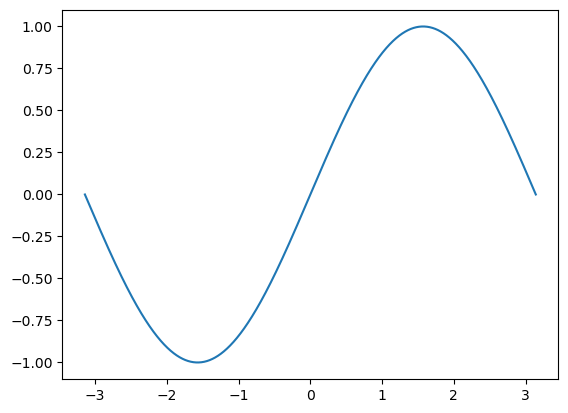

In [107]:
# plot sin function

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

In [108]:
# plot sample of state-action pairs that show process of generating q-max values
# generate Bellman equation for state-action sample of sin function
# go through full process of updating states by hand

In [109]:
# create reward table of states and actions

# what should the states be? 

In [110]:
# plot a circle in matplotlib

In [111]:
t = torch.linspace(-math.pi, math.pi, 2000)
x = 5*torch.cos(t)
x1 = torch.cos(t)
y = torch.sin(t)

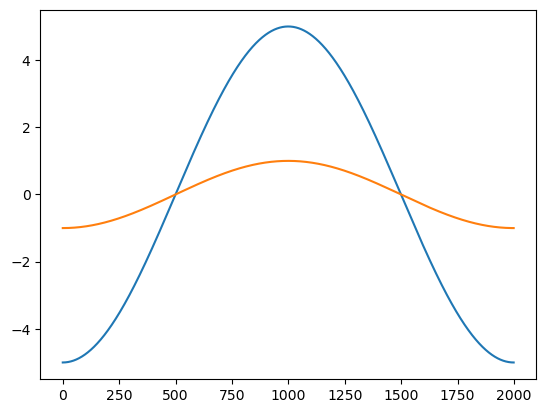

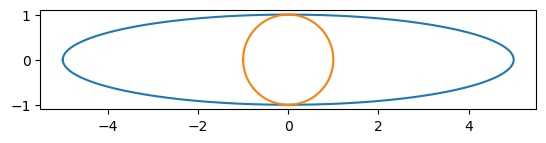

In [112]:
plt.figure()
plt.plot(x)
plt.plot(x1)

plt.figure()
plt.gca().set_aspect('equal')
plt.plot(x, y)
plt.plot(x1, y)

In [113]:
# goal: turn an ellipse into a circle by changing the length of the axes
# we don't know that the axes have to be equal

In [114]:
# state variables: major axis; we don't need to change the minor axis

major_axis = 3.2
minor_axis = 3.0

done = False
# action variables: increase major, decrease major

# reward table:

# increase major: if major < minor, reward = 1, else -1
# decrease major: if major > minor, reward = 1, else -1
# do nothing: reward = 0

def step(action, major_axis, minor_axis, done):
    if done:
        return major_axis, minor_axis, reward, done
    if action == 0: 
        return 0
    if action == 1:
        if major_axis < minor_axis:
            reward = 1
        if major_axis > minor_axis:
            reward = -1
        major_axis += 0.1
    if action == -1:
        if major_axis > minor_axis:
            reward = 1
        if major_axis < minor_axis:
            reward = -1
        major_axis -= 0.1
    if major_axis == minor_axis:
        done = True
        return major_axis, minor_axis, 10, done
    return major_axis, minor_axis, reward, done

In [115]:
major_axis, minor_axis, reward, done = step(1, major_axis, minor_axis, done)

In [116]:
major_axis

3.3000000000000003

In [117]:
done

False

In [118]:
k = [i for i in np.round(np.arange(-0.5, .5, 0.1), 1)]
v = [0 for i in range(len(k))]
q = dict(zip(k,v))

In [119]:
state = round(major_axis - minor_axis, 1)
state

0.3

In [120]:
reward

-1

In [121]:
q[state] = reward + 0.7*(q[state])

In [122]:
q

{-0.5: 0,
 -0.4: 0,
 -0.3: 0,
 -0.2: 0,
 -0.1: 0,
 -0.0: 0,
 0.1: 0,
 0.2: 0,
 0.3: -1.0,
 0.4: 0}

In [123]:
reachable_states = [round(state + .1, 1), round(state - .1, 1)]

In [124]:
state

0.3

In [125]:
reachable_states

[0.4, 0.2]

In [126]:
# get q value of reachable states
[q[state] for state in reachable_states]

[0, 0]

In [127]:
q[state]

-1.0

In [130]:
def step(action, major_axis, minor_axis, done):
    if done:
        return major_axis, minor_axis, reward, done
    if action == 0: 
        return 0
    if action == 1:
        if major_axis < minor_axis:
            reward = 1
        if major_axis > minor_axis:
            reward = -1
        major_axis += 0.1
    if action == -1:
        if major_axis > minor_axis:
            reward = 1
        if major_axis < minor_axis:
            reward = -1
        major_axis -= 0.1
    if major_axis == minor_axis:
        done = True
        return major_axis, minor_axis, 10, done
    return major_axis, minor_axis, reward, done

def get_action(state):
    reachable_states = [round(state + .1, 1), round(state - .1, 1)]
    q_values = [q[state] for state in reachable_states]
    state = max(r for r, q in zip(reachable_states, q_values)) # fix this
    return state

def update(state, reward):
    q[state] = reward + 0.7*(q[state])

In [137]:
for i in range(100):
    if state >= 0.4:
        state = 0.3
    if state <= -0.4:
        state = -0.3
    next_state = get_action(state)
    state = next_state
    update(state, reward)
    print(state)

0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4


In [138]:
q

{-0.5: 0,
 -0.4: 0,
 -0.3: 0,
 -0.2: 0,
 -0.1: 0,
 -0.0: 0,
 0.1: 0,
 0.2: 0,
 0.3: -1.0,
 0.4: 0}